# Домашнее задание 2: Линейные модели. Работа с признаками

## Импорт библиотек и загрузка данных

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os # потому что windows
# from IPython.display import display

В этом задании мы рассмотрим различные аспекты построения линейной модели. Будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

---
О наборе данных
Контекст
Этот классический набор данных содержит информацию о ценах и других характеристиках почти 54 000 бриллиантов. Это отличный набор данных для начинающих, которые учатся работать с анализом и визуализацией данных.

Content
price - цена в долларах США (от 326 до 18 823 долларов)

carat - вес бриллианта (0,2–5,01)

cut - quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color - diamond colour, from J (worst) to D (best)

clarity — показатель того, насколько чист бриллиант (I1 (наихудший), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (наилучший))

x - length in mm (0--10.74)

y - width in mm (0--58.9)

z  - depth in mm (0--31.8)

depth - общая глубина в процентах = z / среднее значение (x, y) = 2 * z / (x + y) (43–79)

table - ширина верхней части ромба относительно самой широкой точки (43–95)




In [191]:
# DIAMONDS = 'diamonds.csv'

In [ ]:
data = pd.read_csv(DIAMONDS)
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Посмотрим на типы столбцов

In [320]:
# pd.DataFrame(data.dtypes, columns=['Data Type'])
data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

## Построение модели

### Задание 1 (1 балл)

Есть ли в наборе данных пропущенные значения? Если да, удалите строки с ними.

Также выведите на экран число пропусков в каждом столбце.

In [326]:
data.shape # смотрим размер таблицы

(53940, 11)

In [328]:
# ваш код здесь
# Смотрим пропущенные значения
print(data.info())
print(data.isnull().sum()) # Пропущенных значений нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB
None
Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


### Задача 2 (1 балл)

Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)?  
Если да, то удалите их. Поясните свой выбор (напишите текстом обоснование)

In [332]:
# удаляем индекс
data.drop(columns = ['Unnamed: 0'], inplace=True)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


---
### Вывод:
Судя по описанию датафрейма могу сделать вывод что лишним будет только индекс(Unnamed: 0), так как он не несет в себе значимой информации для обучения модели. Остальные признаки нужно проверять на зависимость между собой.

### Задание 3 (1 балл)

Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются корреляции между признаками.  
Выведите матрицу корреляций между всеми вещественными признаками и целевой переменной.

Какой вещественный признак коррелирует с целевой переменной больше всего?

Если возникают трудности с тем, чтобы жту матрицу посчитать, почитайте документацию:
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html


PS: Подумайте, как её красиво нарисовать :)

In [337]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Выведем таблицу корреляций
correlation_with_price = data.corr(method='pearson',
                               min_periods=1,
                               numeric_only=True)['price'].sort_values(ascending=False)
correlation_with_price.to_frame()

,price
price,1.000000
carat,0.921591
x,0.884435
y,0.865421
z,0.861249
table,0.127134
depth,-0.010647


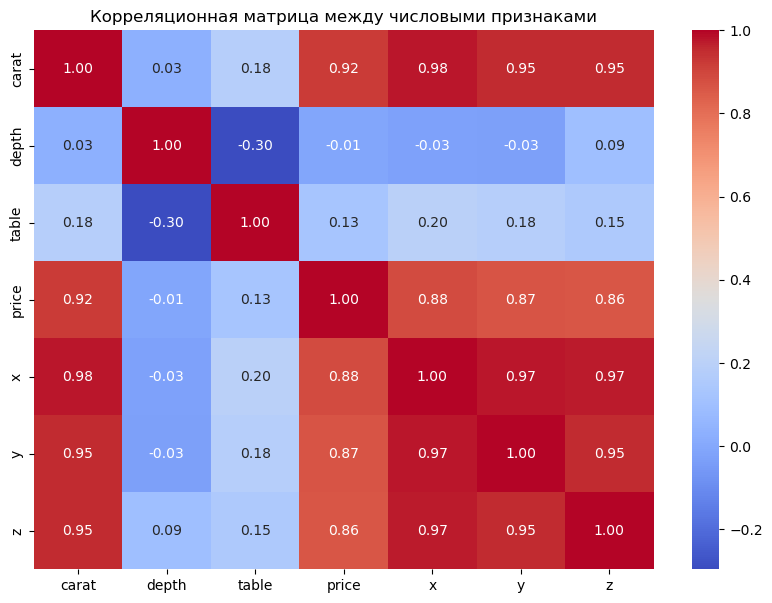

In [339]:
# 5. Визуализация всей корреляционной матрицы
correlation_matrix = data.corr(method='pearson',
                               min_periods=1,
                               numeric_only=True)
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица между числовыми признаками")
plt.show()


In [341]:
target = 'price'
correlations = correlation_matrix[target].drop(target).abs().sort_values(ascending=False)
print("Топ 5 признаков по корреляции с ценой:")
print(correlations.head(5))


Топ 5 признаков по корреляции с ценой:
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
Name: price, dtype: float64


---
### Выводы по матрице корреляций:

С целевой переменной 'price' коррелируют признаки как carat и показатели длины, ширины, глубины. Эти признаки могут выражать похожие свойства, о чем свидетельстельствует сильная корреляция между ними(мультиколлинеарность), что может привести к переобучению. Возможно, стоит исключить какие-то из них из выборки

Признаки table и depth коррелируют меньше всего (<0.3) с целевой переменной, что указывает на то, что они почти не связаны с ценой и не полезны для обучения модели.

In [344]:
# Попробуем оценить зависимость от цены
categorical_cols = data.select_dtypes(include =['object']).columns
categorical_cols
label = []
for col in categorical_cols:
    print(f"Среднее значение цены по категориям признака: {col}")
    print(data.groupby(col)['price'].mean().sort_values(ascending=False).map("{:.2f}".format))
    print()

Среднее значение цены по категориям признака: cut
cut
Premium      4584.26
Fair         4358.76
Very Good    3981.76
Good         3928.86
Ideal        3457.54
Name: price, dtype: object

Среднее значение цены по категориям признака: color
color
J    5323.82
I    5091.87
H    4486.67
G    3999.14
F    3724.89
D    3169.95
E    3076.75
Name: price, dtype: object

Среднее значение цены по категориям признака: clarity
clarity
SI2     5063.03
SI1     3996.00
VS2     3924.99
I1      3924.17
VS1     3839.46
VVS2    3283.74
IF      2864.84
VVS1    2523.11
Name: price, dtype: object



In [346]:
# Оценим пропорции признаков
X = data
num_cols = X.columns[X.dtypes == 'int64'].tolist()
categorical_cols = X.columns[X.dtypes == 'object']

for col in categorical_cols:
    print(col)
    display(X[col].value_counts(normalize=True).to_frame())
    print()

cut


,proportion
cut,
Ideal,0.399537
Premium,0.255673
Very Good,0.223990
Good,0.090953
Fair,0.029848



color


,proportion
color,
G,0.209344
E,0.181628
F,0.176900
H,0.153949
D,0.125603
I,0.100519
J,0.052058



clarity


,proportion
clarity,
SI1,0.242214
VS2,0.227253
SI2,0.170449
VS1,0.151483
VVS2,0.093919
VVS1,0.067760
IF,0.033185
I1,0.013737


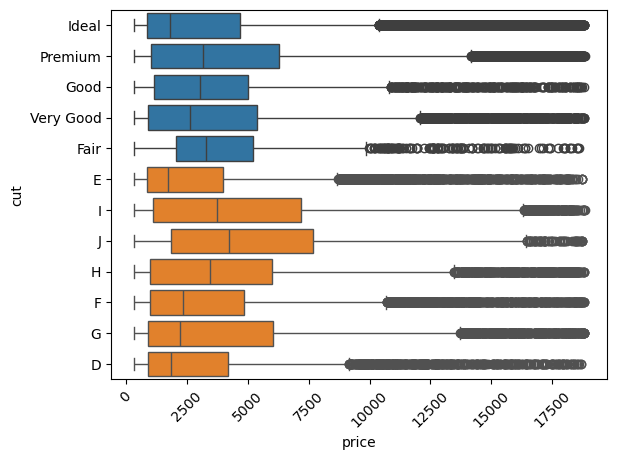

In [348]:
# Боксплоты разброса средних
sns.boxplot(y='cut', x='price', data=data)
sns.boxplot(y='color', x='price', data=data)

plt.xticks(rotation=45
          )
plt.show()

### Задание 4 (1 балл)  

Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования ([`pd.get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) или `sklearn.OneHotEncoder`). Не забудьте поставить значение параметра `drop_first` равным `True`.

Сколько получилось столбцов в таблице `data`?

In [353]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [355]:
print(f"Количество столбцов до кодирования: {len(data.columns)}")

Колличество столбцов до кодирования: 10


In [357]:
# pip install --upgrade scikit-learn

In [359]:
# Возьмем библиотеки OneHotEncoder

from sklearn.preprocessing import OneHotEncoder
from category_encoders.ordinal import OrdinalEncoder # LabelEncoder
# from category_encoders.one_hot import OneHotEncoder # OneHotEncoding - неактаульна
from category_encoders.target_encoder import TargetEncoder # счетчики+сглаживание

In [361]:
# берем категориальные признаки
categorical_cols = data.select_dtypes(include =['object'])


# OneHot-кодирование пандасовским методом
data_encoded = pd.get_dummies(data, 
                              columns=categorical_cols.columns, 
                              drop_first=True)


# Sklearn-кодирование
encoder = OneHotEncoder(drop='first', sparse_output=False)
# Приименяем к категорийным колонкам
encoded_data = encoder.fit_transform(data[categorical_cols.columns])
# Объединяем с числовыми признаками
data_encoded_SK = pd.concat([
    data.drop(categorical_cols.columns,axis=1), # удаляем исходные
    pd.DataFrame(encoded_data, 
                 columns=encoder.get_feature_names_out())
                        ], axis=1) # Добавляем закодированные


print(f"Количество столбцов после кодирования пандас: {len(data_encoded.columns)}")
print(f"Количество столбцов после кодирования Sklearn: {len(data_encoded_SK.columns)}")

Колличество столбцов после кодирования пандас: 24
Колличество столбцов после кодирования Sklearn: 24


In [363]:
data_encoded

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,True,...,False,True,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,True,False,False,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,False,True,False,...,False,False,False,False,True,False,False,False,False,False
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,True,False,False,...,False,False,False,False,True,False,False,False,False,False
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,False,False,False,...,False,False,False,False,True,False,False,False,False,False
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,False,False,True,...,True,False,False,False,False,True,False,False,False,False


In [365]:
data_encoded_SK

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Задание 5 (1 балл)

Создайте матрицу `X`, содержащую все признаки, и не содержащую целевую переменную `price`.  
Также создайте вектор `y`, содержащий целевую переменную `price`.

In [369]:
X = data_encoded

In [371]:
X = data_encoded.drop(columns=["price"])  # Все признаки, кроме 'price'
y = data_encoded["price"]  

In [373]:
X.dtypes

carat            float64
depth            float64
table            float64
x                float64
y                float64
z                float64
cut_Good            bool
cut_Ideal           bool
cut_Premium         bool
cut_Very Good       bool
color_E             bool
color_F             bool
color_G             bool
color_H             bool
color_I             bool
color_J             bool
clarity_IF          bool
clarity_SI1         bool
clarity_SI2         bool
clarity_VS1         bool
clarity_VS2         bool
clarity_VVS1        bool
clarity_VVS2        bool
dtype: object

Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной `0.3`

При разбиении укажите `random_state = 42`

In [376]:
from sklearn.model_selection import train_test_split

# ваш код здесь вместо 1234
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    )

In [378]:
print(f"Размер обучающей выборки: {len(X_train)}")
print(f"Размер тестовой выборки: {len(X_test)}")
print(f"Распределение классов в y_train: {np.bincount(y_train)}")
print(f"Распределение классов в y_test: {np.bincount(y_test)}")

Размер обучающей выборки: 37758
Размер тестовой выборки: 16182
Распределение классов в y_train: [0 0 0 ... 0 0 1]
Распределение классов в y_test: [0 0 0 ... 0 0 1]


### Задание 6 (1 балл)

Зачастую при использовании линейных моделей вещественные признаки масштабируются.  В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`

*  Обучите (`fit`) scaler на тренировочных данных
*  Преобразуйте (`transform`) и трейн, и тест

После применения масштабирования матрица перестает быть объектом `pandas.DataFrame` - решите эту проблему

In [382]:
X_train.select_dtypes(include=['int64', 'float64'])

,carat,depth,table,x,y,z
19497,1.21,61.3,57.0,6.92,6.87,4.23
31229,0.31,62.0,56.0,4.38,4.36,2.71
22311,1.21,62.4,57.0,6.75,6.83,4.24
278,0.81,62.6,55.0,5.92,5.96,3.72
6646,0.79,61.7,56.0,5.94,5.95,3.67
...,...,...,...,...,...,...
11284,1.05,62.4,59.0,6.48,6.51,4.05
44732,0.47,61.0,55.0,5.03,5.01,3.06
38158,0.33,60.3,58.0,4.49,4.46,2.70
860,0.90,62.8,59.0,6.13,6.03,3.82


In [384]:
from sklearn.preprocessing import StandardScaler

# ваш код здесь
# 1. Выделяем числовые колонки
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 2. Создаем и обучаем scaler на числовых признаках трейна
scaler = StandardScaler()
scaler.fit(X_train[num_cols])

# 3. Преобразуем числовые признаки в train и test
X_train_scaled = X_train.copy()  # Создаем копию, чтобы не менять исходные данные
X_test_scaled = X_test.copy()

# Масштабируем только числовые колонки
X_train_scaled[num_cols] = scaler.transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])


# 4. Выводим результат (только числовые признаки для наглядности)
print("Тренировочные данные после масштабирования:")
print(X_train_scaled[num_cols].head())
print("\nТестовые данные после масштабирования:")
print(X_test_scaled[num_cols].head())

Тренировочные данные после масштабирования:
          carat     depth     table         x         y         z
19497  0.862659 -0.311437 -0.207099  1.055581  0.986556  0.968253
31229 -1.029889  0.178549 -0.656213 -1.207734 -1.202544 -1.168276
22311  0.862659  0.458541 -0.207099  0.904099  0.951670  0.982309
278    0.021527  0.598537 -1.105327  0.164512  0.192898  0.251391
6646  -0.020530 -0.031445 -0.656213  0.182333  0.184176  0.181110

Тестовые данные после масштабирования:
          carat     depth     table         x         y         z
1388  -1.177087  0.248547 -0.656213 -1.573073 -1.516519 -1.505623
50052 -0.462124 -1.221412 -0.207099 -0.263201 -0.278064 -0.395190
41645 -0.840634  0.248547 -1.105327 -0.869128 -0.871127 -0.830930
42377 -0.777549 -0.661428 -0.207099 -0.726557 -0.740304 -0.788761
17244  1.577621  0.388543 -1.105327  1.518937  1.422631  1.502385


### Задание 7 (1 балл)

Обучите линейную регрессию (LinearRegression) на тренировочной выборке. Выведите r2-score на тренировочной и тестовой выборках

In [388]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# переменная модели
model = LinearRegression()
# Обучение модели на масштабированных данных
model.fit(X_train_scaled, y_train)

# Предсказания
y_pred = model.predict(X_test_scaled)

# Оценка качества
r2_train = model.score(X_train_scaled, y_train)
r2_test =r2_score(y_test, y_pred)
print(f"R2 на трейне: {r2_train:.2f}")
print(f"R2 на тесте : {r2_test:.2f}")

R2 на трейне: 0.92
R2 на тесте : 0.92


In [390]:
# предположу что модель могла переобучится, 
# так как ранее мы обноружели признаки мультиколлинеарности

from sklearn.metrics import r2_score, mean_absolute_error

# Предсказания на трейне
y_train_pred = model.predict(X_train_scaled)

# Сравни метрики
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)

print(f"R2 на трейне: {r2_train:.3f}")
print(f"R2 на тесте : {r2_test:.3f}")

print(f"MAE train: {mean_absolute_error(y_train, y_train_pred):.2f}")
print(f"MAE test : {mean_absolute_error(y_test, y_pred):.2f}")


R2 на трейне: 0.920
R2 на тесте : 0.920
MAE train: 746.03
MAE test : 734.24


In [392]:
# Кросс-валидация

from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(f"Средний R² по кросс-валидации: {np.mean(scores):.3f} ± {np.std(scores):.3f}")


Средний R² по кросс-валидации: 0.919 ± 0.002


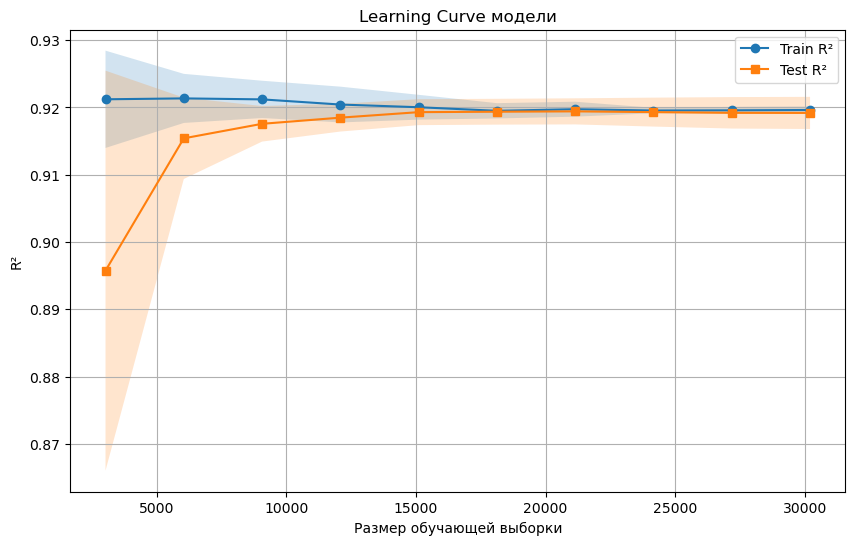

In [394]:
# График Learning Curve

from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='r2',
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

# Средние и отклонения
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Train R²', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label='Test R²', marker='s')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel("Размер обучающей выборки")
plt.ylabel("R²")
plt.title("Learning Curve модели")
plt.legend()
plt.grid(True)
plt.show()



### Вывод:
Но как видно из проверок на ошибки переобучения нет - возможно выборка подготовленна хорошо и веса признаков не перевешивают в общей массе.

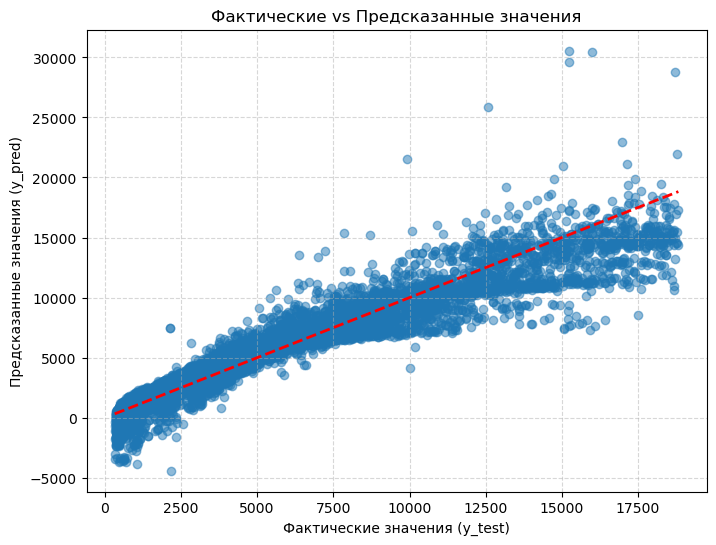

In [397]:
# Немного визуализации

# После получения предсказаний модели
y_pred = model.predict(X_test_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Диагональ
plt.title("Фактические vs Предсказанные значения")
plt.xlabel("Фактические значения (y_test)")
plt.ylabel("Предсказанные значения (y_pred)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

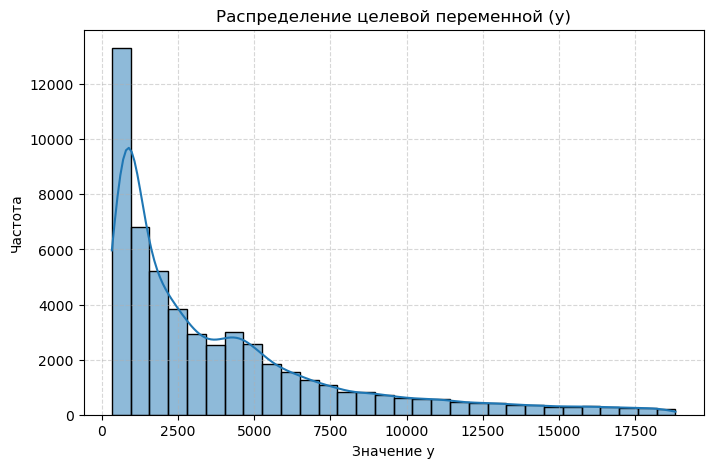

In [399]:
import matplotlib.pyplot as plt
import seaborn as sns


# Гистограмма + KDE
plt.figure(figsize=(8, 5))
sns.histplot(y, kde=True, bins=30)
plt.title("Распределение целевой переменной (y)")
plt.xlabel("Значение y")
plt.ylabel("Частота")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Задание 8 (1 балл)

Выведите на экран веса (coef_), которые линейная регрессия присвоила признакам. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных

In [403]:
# Вывод коэффициентов
print("Веса признаков:", model.coef_)

Веса признаков: [ 5338.61567061   -90.17381703   -60.33227991 -1100.41885004
    -6.45891672   -34.25894462   595.52108013   846.19625755
   777.76996276   743.30136029  -217.02896774  -273.30397584
  -500.16023818  -998.63466917 -1476.08423332 -2381.98978847
  5459.03729976  3751.70967126  2781.94054814  4657.83430708
  4336.72558298  5101.33518107  5028.29553044]


In [425]:
# Получаем Series с названиями признаков и весами
coefs = pd.Series(model.coef_, index=X_train_scaled.columns)

# Только вещественные признаки
num_cols = X_train_scaled.select_dtypes(include=['float64', 'int64']).columns
num_coefs = coefs[num_cols]

important_coefs = num_coefs.abs().sort_values(ascending=False)
print("Топ вещественных признаков по важности:")
print(important_coefs.head(10))

Топ вещественных признаков по важности:
carat    5338.615671
x        1100.418850
depth      90.173817
table      60.332280
z          34.258945
y           6.458917
dtype: float64



### Вывод:
carat — доминирующий вещественный признак в модели.
x тоже важен, но уже в 5 раз слабее.
Остальные (depth, table, z, y) — второстепенные.

## Попытка улучшить качество модели

Эта часть является творческой, и задания в ней немного сложнее, чем предыдущие.  
Поэтому за каждое из них можно получить до двух баллов.

### Задание 9 (2 балла)

Как можно заметить из анализа корреляционной матрицы в задании 3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче, также свидетельствуют об этом. Для решения этой проблемы можно либо исключить некоторые признаки из модели (например, если признак линейно зависим с какими-то другими, его можно исключить из модели, т.е. удалить из матрицы объект-признак и заново обучить модель).

Удалите из матриц `Xtrain` и `Xtest` признак, который наиболее сильно коррелирует с остальными. Заново обучите модель и оцените её качество. Улучшилось ли качество модели?

Попробуйте удалить какой-то другой признак (можете попробовать несколько вариантов). Помогло ли это улучшить качество модели?

In [293]:
# удалим признак carat, а также слабо калерирущие  вещественные признаки depth и table
cols_to_remove = ['depth'  
                  ,'table'
                  # ,'carat'
                 # ,'x'
                 # ,'z'
                 # ,'y'      
                 ]

# Создаём новые выборки с оставшимися признаками
X_train_reduced = X_train.drop(columns=cols_to_remove)
X_test_reduced = X_test.drop(columns=cols_to_remove)
cols_to_remove

['depth', 'table']

In [295]:
# 1. Выделяем числовые колонки из именно X_train_reduced
num_cols = X_train_reduced.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 2. Создаем и обучаем scaler на числовых признаках трейна
scaler = StandardScaler()
scaler.fit(X_train_reduced[num_cols])

# 3. Преобразуем числовые признаки в train и test
X_train_scaled = X_train_reduced.copy()
X_test_scaled = X_test_reduced.copy()

# Масштабируем только числовые колонки
X_train_scaled[num_cols] = scaler.transform(X_train_reduced[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test_reduced[num_cols])


In [297]:
# Обучаем модель
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Предсказания
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

# Оценка качества
r2_train = model.score(X_train_scaled, y_train)
r2_test =r2_score(y_test, y_pred)

# Метрики
print(f"Оценка модели без признаков 'depth' и 'table':")
print(f"R2 train: {r2_score(y_train, y_train_pred):.3f}")
print(f"R2 test : {r2_score(y_test, y_pred):.3f}")
print(f"MAE train: {mean_absolute_error(y_train, y_train_pred):.2f}")
print(f"MAE test : {mean_absolute_error(y_test, y_pred):.2f}")

Оценка модели без признаков 'depth' и 'table':
R2 train: 0.919
R2 test : 0.920
MAE train: 749.81
MAE test : 738.11


### Вывод:
Удаление depth и table почти не повлияло на метрики модели.
Однако, удаление признака  carat или схожих x, y, z - привело к ухудшению точности модели.

### Задание 10 (2 балла)

Иногда генерация новых признаков помогает модели лучше находить взаимосвязи между целевой переменной и признаками. Попробуйте придумать свои новые признаки и добавить их в модель.  

Помогло ли это улучшить качество модели?

In [302]:
#  Создим признак volume
X_train['volume'] = X_train['x'] * X_train['y'] * X_train['z']
X_test['volume'] = X_test['x'] * X_test['y'] * X_test['z']

In [304]:
# Удалим схожие признаки
# (carat, x, y, z — уже "учтены" в объёме, depth и table — слабые)
cols_to_remove = ['x', 'y', 'z', 'depth', 'table']
X_train_reduced = X_train.drop(columns=cols_to_remove)
X_test_reduced = X_test.drop(columns=cols_to_remove)


In [306]:
# Определяем числовые признаки и масштабируем
num_cols = X_train_reduced.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
scaler.fit(X_train_reduced[num_cols])

# Создаём копии для масштабированных данных
X_train_scaled = X_train_reduced.copy()
X_test_scaled = X_test_reduced.copy()

# Применяем трансформацию
X_train_scaled[num_cols] = scaler.transform(X_train_reduced[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test_reduced[num_cols])

# Обучаем модель
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Предсказания
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

# Оценка качества
r2_train = model.score(X_train_scaled, y_train)
r2_test =r2_score(y_test, y_pred)

# Метрики
print(f"Оценка модели с признаком 'volume':")
print(f"R2 train: {r2_score(y_train, y_train_pred):.3f}")
print(f"R2 test : {r2_score(y_test, y_pred):.3f}")
print(f"MAE train: {mean_absolute_error(y_train, y_train_pred):.2f}")
print(f"MAE test : {mean_absolute_error(y_test, y_pred):.2f}")

Оценка модели с признаком 'volume':
R2 train: 0.916
R2 test : 0.916
MAE train: 808.96
MAE test : 797.41


Сделайте выводы, исходя из проделанной работы.

Какого наилучшего качества удалось добиться? Хорошее ли это качество на ваш взгляд? Что для этого вам пришлось сделать?

---
### Выводы

- Наилучшее качество модели достигнуто при использовании всех признаков, включая `carat`.  
  - R2 train = 0.920  
  - R2 test = 0.919  
  - MAE test около 737

- Удаление carat приводит к значительному ухудшению:  
  - R2 test падает до 0.842  
  - MAE возрастает до ≈ 1201

- Замена carat на volume улучшает ситуацию по сравнению с полной его потерей, но не восстанавливает исходное качество:

  - R2 test = 0.916  
  - MAE test ≈ 797



- Признак carat оказывается наиболее значимым, он обобщает информацию о размере и массе лучше, чем геометрические параметры.
- Использование всех признаков, масштабирование числовых и кодирование категориальных дало наилучший результат.
- Качество модели можно считать высоким — модель объясняет более 91% дисперсии цены и ошибается в среднем на ~737 долларов.

